In [26]:
import tensorflow as tf

In [27]:
from tensorflow  import keras

In [28]:
from tensorflow.keras import datasets,layers,models

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [31]:
class_names=['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [32]:
x_train.shape

(50000, 32, 32, 3)

In [33]:
x_test.shape

(10000, 32, 32, 3)

In [34]:
# Normalization: 0 is black and 255 is white

x_train,x_test=x_train/255,x_test/255

In [35]:
def fetch_img(x,y,index):
    plt.figure(figsize=(15,3))
    plt.imshow(x[index])
    plt.xlabel(class_names[int(y[index])])

C:\Users\Sakshi Zalpuri\AppData\Local\Temp\ipykernel_10160\3987733097.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y[index])])


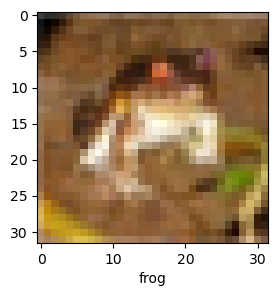

In [36]:
fetch_img(x_train,y_train,0)

C:\Users\Sakshi Zalpuri\AppData\Local\Temp\ipykernel_10160\3987733097.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y[index])])


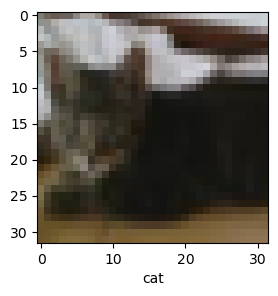

In [37]:
fetch_img(x_train,y_train,9)

In [54]:
# Build a model:



cnn = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

C:\Users\Sakshi Zalpuri\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [56]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.4580 - loss: 1.5140
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5933 - loss: 1.1564
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6373 - loss: 1.0369
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6670 - loss: 0.9529
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6870 - loss: 0.8936
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7041 - loss: 0.8505
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7211 - loss: 0.8032
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7304 - loss: 0.7663
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7409 - loss: 0.7384
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7533 - loss: 0.7085


In [58]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6678 - loss: 0.9830 


[0.9829999208450317, 0.6678000092506409]

# Prediction:

In [60]:
y_hat=cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [61]:
y_hat

array([[4.0077609e-03, 7.4667932e-04, 3.6056314e-04, ..., 4.1980107e-04,
        6.1361390e-01, 1.1701776e-02],
       [8.7632600e-04, 7.1864590e-02, 3.8360117e-06, ..., 3.2591934e-08,
        9.2021376e-01, 7.0373020e-03],
       [8.7674474e-03, 4.2403644e-01, 2.0052318e-03, ..., 1.9328415e-03,
        4.5566112e-01, 7.7083811e-02],
       ...,
       [8.6593082e-06, 1.2498043e-06, 7.4698580e-03, ..., 5.1824278e-03,
        4.3822125e-05, 6.7255714e-06],
       [1.5102823e-01, 6.6733247e-01, 3.3227429e-03, ..., 4.5582303e-03,
        6.8940449e-06, 2.2082760e-03],
       [9.2266519e-06, 2.0093512e-04, 2.6777285e-04, ..., 9.5660293e-01,
        1.5390333e-05, 3.7390935e-05]], dtype=float32)

In [62]:
index_con=np.argmax(y_hat,axis=1)

In [63]:
index_con

array([8, 8, 8, ..., 5, 1, 7])

In [64]:
y_hat[:5]

array([[4.0077609e-03, 7.4667932e-04, 3.6056314e-04, 2.2150208e-01,
        4.4172335e-05, 1.3777219e-01, 9.8311407e-03, 4.1980107e-04,
        6.1361390e-01, 1.1701776e-02],
       [8.7632600e-04, 7.1864590e-02, 3.8360117e-06, 2.1604378e-06,
        2.2612394e-07, 4.8459693e-08, 1.6789121e-06, 3.2591934e-08,
        9.2021376e-01, 7.0373020e-03],
       [8.7674474e-03, 4.2403644e-01, 2.0052318e-03, 2.0512208e-02,
        7.1139121e-04, 6.0204417e-03, 3.2690198e-03, 1.9328415e-03,
        4.5566112e-01, 7.7083811e-02],
       [6.9976437e-01, 6.2232941e-02, 7.4440502e-02, 1.6873858e-03,
        2.0253586e-02, 1.4298802e-04, 1.2964291e-03, 2.0266489e-04,
        1.2876877e-01, 1.1210402e-02],
       [6.0577031e-07, 1.6638146e-04, 3.8938862e-03, 6.4727724e-01,
        8.9599676e-02, 2.6754430e-02, 2.3211113e-01, 3.2157644e-05,
        1.5924452e-04, 5.2051937e-06]], dtype=float32)

In [65]:
y_class=[np.argmax(i) for i in y_hat[:5]]

In [66]:
y_class

[np.int64(8), np.int64(8), np.int64(8), np.int64(0), np.int64(3)]

In [67]:
class_names

['airplane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

C:\Users\Sakshi Zalpuri\AppData\Local\Temp\ipykernel_10160\3987733097.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y[index])])


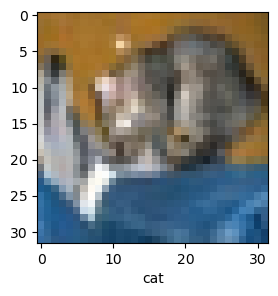

In [68]:
fetch_img(x_test,y_test,0)

C:\Users\Sakshi Zalpuri\AppData\Local\Temp\ipykernel_10160\3987733097.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y[index])])


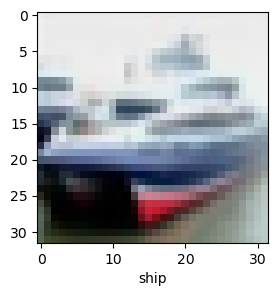

In [69]:
fetch_img(x_test,y_test,1)

C:\Users\Sakshi Zalpuri\AppData\Local\Temp\ipykernel_10160\3987733097.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y[index])])


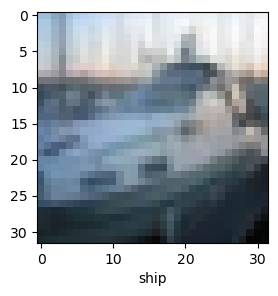

In [70]:
fetch_img(x_test,y_test,2)

C:\Users\Sakshi Zalpuri\AppData\Local\Temp\ipykernel_10160\3987733097.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y[index])])


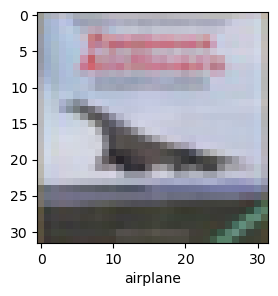

In [71]:
fetch_img(x_test,y_test,3)

C:\Users\Sakshi Zalpuri\AppData\Local\Temp\ipykernel_10160\3987733097.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y[index])])


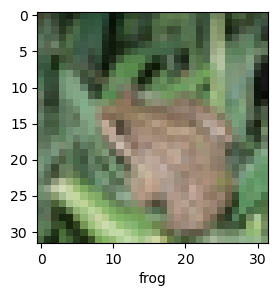

In [72]:
fetch_img(x_test,y_test,4)

C:\Users\Sakshi Zalpuri\AppData\Local\Temp\ipykernel_10160\3987733097.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y[index])])


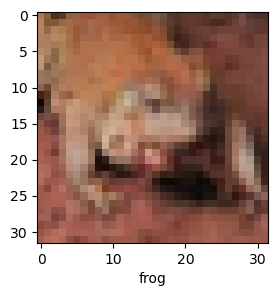

In [73]:
fetch_img(x_test,y_test,5)

C:\Users\Sakshi Zalpuri\AppData\Local\Temp\ipykernel_10160\3987733097.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y[index])])


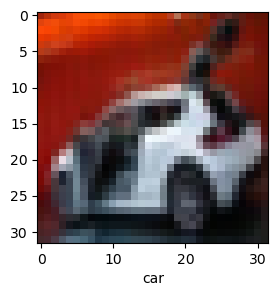

In [74]:
fetch_img(x_test,y_test,6)

C:\Users\Sakshi Zalpuri\AppData\Local\Temp\ipykernel_10160\3987733097.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y[index])])


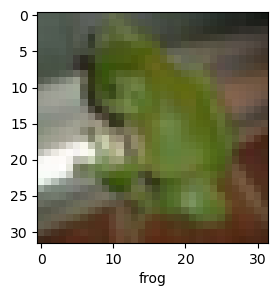

In [75]:
fetch_img(x_test,y_test,7)